### Setup Dependencies

In [2]:
import pandas as pd
from tqdm import tqdm
import cv2
import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
import numpy as np
import cv2
from PIL import Image
import gc
gc.enable()
import matplotlib.pyplot as plt

### Load classes and I/O labels of Places365 Dataset

In [ ]:
list_in_sun = "amusement_arcade","art_school","bakery_shop","basement","beauty_salon","building_facade","fastfood_restaurant","parking_lot","playground","sky","auto_factory","garbage_dump","street","videostore","diner_outdoor"

In [3]:
import shutil
import os
from pathlib import Path

# Define source directories
src_dir_caltech = '/kaggle/input/caltech-101/caltech-101'
src_dir_celebrity = '/kaggle/input/50k-celebrity-faces-image-dataset/Celebrity_Faces_Dataset'
dst_dir = '/kaggle/working/non_landmark'

# Create the destination directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# Copy Caltech-101 categories to the destination directory
for category in os.listdir(src_dir_caltech):
    category_path = os.path.join(src_dir_caltech, category)
    if os.path.isdir(category_path):
        shutil.copytree(category_path, os.path.join(dst_dir, category))

# Copy the celebrity face images (first 40,000 images) to a new subfolder in non_landmark
celebrity_dst_dir = os.path.join(dst_dir, 'celebrity_faces')
os.makedirs(celebrity_dst_dir, exist_ok=True)

# Assuming the celebrity faces are sequentially numbered from 000003.jpg onwards
for i in range(1, 40000):  # Starting from 000003.jpg to 000040000.jpg
    img_name = f"{i:06}.jpg"  # Format the image number as 6 digits
    src_img_path = os.path.join(src_dir_celebrity, img_name)
    
    # Check if the source image exists before copying
    if os.path.exists(src_img_path):
        dst_img_path = os.path.join(celebrity_dst_dir, img_name)
        shutil.copy(src_img_path, dst_img_path)

print("All Caltech-101 and celebrity face images have been copied to the target directory.")

FileExistsError: [Errno 17] File exists: '/kaggle/working/non_landmark/scorpion'

In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/id-2-names-landmark/ID_to_names/train_with_landmark_names.csv",encoding = "Latin1")  # replace with your actual filename
total_ids = df["id"].count()
print("Total ID entries:", total_ids)
unique_ids = df["landmark_id"].nunique()
print("Unique landmark id entries:", unique_ids)

In [3]:
import shutil
import os
from pathlib import Path

# Define source directories
src_dir_caltech = '/kaggle/input/caltech-101/caltech-101'
src_dir_celebrity = '/kaggle/input/50k-celebrity-faces-image-dataset/Celebrity_Faces_Dataset'
src_dir_sun397 = '/kaggle/input/sun397-50-50/train/train'
dst_dir = '/kaggle/working/non_landmark'

# Create the destination directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# 1. Copy Caltech-101 categories to the destination directory
for category in os.listdir(src_dir_caltech):
    category_path = os.path.join(src_dir_caltech, category)
    if os.path.isdir(category_path):
        dst_category_path = os.path.join(dst_dir, category)
        os.makedirs(dst_category_path, exist_ok=True)
        for img_file in os.listdir(category_path):
            src_img_path = os.path.join(category_path, img_file)
            dst_img_path = os.path.join(dst_category_path, img_file)
            if os.path.isfile(src_img_path):
                shutil.copy(src_img_path, dst_img_path)

# 2. Copy 10,000 celebrity face images to a subfolder
celebrity_dst_dir = os.path.join(dst_dir, 'celebrity_faces')
os.makedirs(celebrity_dst_dir, exist_ok=True)

for i in range(1, 10001):  # 10,000 images
    img_name = f"{i:06}.jpg"
    src_img_path = os.path.join(src_dir_celebrity, img_name)
    if os.path.exists(src_img_path):
        dst_img_path = os.path.join(celebrity_dst_dir, img_name)
        shutil.copy(src_img_path, dst_img_path)

# 3. Copy selected SUN397 categories
sun_categories = [
    "amusement_arcade", "art_school", "bakery_shop", "basement", "beauty_salon",
    "building_facade", "fastfood_restaurant", "parking_lot", "playground",
    "auto_factory", "garbage_dump", "street", "videostore", "diner_outdoor"
]

sun_dst_dir = os.path.join(dst_dir, 'sun397')
os.makedirs(sun_dst_dir, exist_ok=True)

for category in sun_categories:
    category_path = os.path.join(src_dir_sun397, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            src_img_path = os.path.join(category_path, img_file)
            dst_img_path = os.path.join(sun_dst_dir, f"{category}_{img_file}")
            shutil.copy(src_img_path, dst_img_path)

print("✅ Caltech-101, Celebrity Faces (10k), and selected SUN397 images copied to non_landmark directory.")

✅ Caltech-101, Celebrity Faces (10k), and selected SUN397 images copied to non_landmark directory.


In [4]:
import pandas as pd
from pathlib import Path
import shutil

# Load the CSV
df = pd.read_csv('/kaggle/input/id-2-names-landmark/ID_to_names/train_with_landmark_names.csv', encoding='ISO-8859-1')
df.columns = ['id', 'landmark_id', 'landmark_name']  # Ensure correct columns

# Define new sample size
images_per_landmark = 200

# Target directory
target_dir = Path('/kaggle/working/landmark')

# ❌ Delete existing folder if it exists
if target_dir.exists() and target_dir.is_dir():
    shutil.rmtree(target_dir)

# ✅ Recreate target directory
target_dir.mkdir(parents=True, exist_ok=True)

# Sample up to 70 images per landmark
sampled_df = df.groupby('landmark_id').apply(
    lambda x: x.sample(n=min(len(x), images_per_landmark), random_state=42)
).reset_index(drop=True)

print(f"✅ Selected {len(sampled_df)} images across {sampled_df['landmark_id'].nunique()} landmarks.")

# Copy selected images
copied = 0
for _, row in sampled_df.iterrows():
    image_id = row['id']
    subfolder = f"{image_id[0]}/{image_id[1]}/{image_id[2]}"
    src_path = Path(f"/kaggle/input/landmark-recognition-2021/train/{subfolder}/{image_id}.jpg")
    dst_path = target_dir / f"{image_id}.jpg"

    if src_path.exists():
        shutil.copy(src_path, dst_path)
        copied += 1

print(f"✅ Copied {copied} images to {target_dir}")


✅ Selected 19800 images across 99 landmarks.
✅ Copied 19783 images to /kaggle/working/landmark


In [5]:
from pathlib import Path

# Count landmark images
landmark_path = Path('/kaggle/working/landmark')
landmark_count = len(list(landmark_path.glob('*.jpg')))

# Count non-landmark images (recursively search all subfolders)
non_landmark_path = Path('/kaggle/working/non_landmark')
non_landmark_count = len(list(non_landmark_path.glob('**/*.jpg')))

print(f"Landmark images: {landmark_count}")
print(f"Non-landmark images: {non_landmark_count}")

Landmark images: 19783
Non-landmark images: 19830


In [59]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

# List images and assign labels
#landmark_images = [(str(p), 1) for p in Path('/kaggle/working/landmark').glob('*.jpg')]
#non_landmark_images = [(str(p), 0) for p in Path('/kaggle/working/non_landmark').rglob('*.jpg')]

# Combine
df = pd.DataFrame(landmark_images + non_landmark_images, columns=['filepath', 'label'])

# Train/val/test split
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

AttributeError: 'bool' object has no attribute 'any'

In [60]:
all_images = landmark_images + non_landmark_images

# Create DataFrame
df = pd.DataFrame(all_images, columns=['filepath', 'label'])

# Check df is loaded correctly
print(df.head())

               filepath                                              label
0  ba8d3f23aba5d2e8.jpg  [[[tensor(-0.3712), tensor(-0.4226), tensor(-0...
1  c0e9ce393033c983.jpg  [[[tensor(-0.7137), tensor(-0.8849), tensor(-0...
2  143e62195f8a8042.jpg  [[[tensor(-1.1075), tensor(-1.1932), tensor(-1...
3  217ebb0fb73e6a99.jpg  [[[tensor(0.0912), tensor(0.1426), tensor(0.17...
4  08654c9e9ab5783d.jpg  [[[tensor(-0.0458), tensor(-0.0458), tensor(-0...


In [61]:
print(df['label'].head())
print(type(df.loc[0, 'label']))

0    [[[tensor(-0.3712), tensor(-0.4226), tensor(-0...
1    [[[tensor(-0.7137), tensor(-0.8849), tensor(-0...
2    [[[tensor(-1.1075), tensor(-1.1932), tensor(-1...
3    [[[tensor(0.0912), tensor(0.1426), tensor(0.17...
4    [[[tensor(-0.0458), tensor(-0.0458), tensor(-0...
Name: label, dtype: object
<class 'torch.Tensor'>


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

class LandmarkDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.loc[idx, 'filepath']
        label = self.data.loc[idx, 'label']
        image = Image.open(img_path).convert('RGB')  # Ensure all images are in RGB format
        if self.transform:
            image = self.transform(image)
        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),  # Augmentation for rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalizing RGB channels
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalizing RGB channels
])

# Datasets and Loaders
train_ds = LandmarkDataset(train_df, transform=train_transform)
val_ds = LandmarkDataset(val_df, transform=test_transform)
test_ds = LandmarkDataset(test_df, transform=test_transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

In [ ]:
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained MobileNetV2
model = models.mobilenet_v2(pretrained=True)

# Replace classifier for binary classification (NO Sigmoid here)
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.last_channel, 1)  # Output raw logits
)

# Move model to device
model.to(device)

# Use BCEWithLogitsLoss (includes sigmoid internally)
criterion = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=3, device='cuda'):
    history = {
        'train_loss': [], 'train_acc': [], 'val_acc': [],
        'train_precision': [], 'train_recall': [], 'train_f1': [], 'train_auc': [],
        'val_precision': [], 'val_recall': [], 'val_f1': [], 'val_auc': []
    }

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        all_train_labels = []
        all_train_preds = []

        # Training loop
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            correct += ((outputs > 0.5).float() == labels).sum().item()

            all_train_labels.extend(labels.cpu().numpy())
            all_train_preds.extend(outputs.cpu().detach().numpy())

        # Calculate training metrics
        train_acc = correct / len(train_loader.dataset)
        train_precision = precision_score(all_train_labels, (torch.tensor(all_train_preds) > 0.5).int(), average='binary')
        train_recall = recall_score(all_train_labels, (torch.tensor(all_train_preds) > 0.5).int(), average='binary')
        train_f1 = f1_score(all_train_labels, (torch.tensor(all_train_preds) > 0.5).int(), average='binary')
        train_auc = roc_auc_score(all_train_labels, all_train_preds)

        history['train_loss'].append(running_loss)
        history['train_acc'].append(train_acc)
        history['train_precision'].append(train_precision)
        history['train_recall'].append(train_recall)
        history['train_f1'].append(train_f1)
        history['train_auc'].append(train_auc)

        # Validation loop
        model.eval()
        val_correct = 0
        all_val_labels = []
        all_val_preds = []
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.float().unsqueeze(1).to(device)
                outputs = model(images)
                val_correct += ((outputs > 0.5).float() == labels).sum().item()

                all_val_labels.extend(labels.cpu().numpy())
                all_val_preds.extend(outputs.cpu().detach().numpy())

        # Calculate validation metrics
        val_acc = val_correct / len(val_loader.dataset)
        val_precision = precision_score(all_val_labels, (torch.tensor(all_val_preds) > 0.5).int(), average='binary')
        val_recall = recall_score(all_val_labels, (torch.tensor(all_val_preds) > 0.5).int(), average='binary')
        val_f1 = f1_score(all_val_labels, (torch.tensor(all_val_preds) > 0.5).int(), average='binary')
        val_auc = roc_auc_score(all_val_labels, all_val_preds)

        history['val_acc'].append(val_acc)
        history['val_precision'].append(val_precision)
        history['val_recall'].append(val_recall)
        history['val_f1'].append(val_f1)
        history['val_auc'].append(val_auc)

        # Print and plot progress
        clear_output(wait=True)  # Clear previous output in notebook
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}, Train Precision: {train_precision:.4f}, "
              f"Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, Train AUC: {train_auc:.4f}")
        print(f"Val Acc: {val_acc:.4f}, Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, "
              f"Val F1: {val_f1:.4f}, Val AUC: {val_auc:.4f}")

        # Plot after each epoch
        plt.figure(figsize=(12, 8))

        # Loss and Accuracy
        plt.subplot(2, 2, 1)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.legend()

        plt.subplot(2, 2, 2)
        plt.plot(history['train_acc'], label='Train Acc')
        plt.plot(history['val_acc'], label='Val Acc')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        # Precision, Recall, F1, AUC
        plt.subplot(2, 2, 3)
        plt.plot(history['train_precision'], label='Train Precision')
        plt.plot(history['val_precision'], label='Val Precision')
        plt.xlabel('Epoch')
        plt.ylabel('Precision')
        plt.title('Precision')
        plt.legend()

        plt.subplot(2, 2, 4)
        plt.plot(history['train_f1'], label='Train F1 Score')
        plt.plot(history['val_f1'], label='Val F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.title('F1 Score')
        plt.legend()

        plt.tight_layout()
        plt.show()

    return history

In [ ]:
history = train_model(model, train_loader, val_loader, criterion, optimizer)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = torch.sigmoid(model(images))
            preds = (outputs > 0.5).int().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.int().cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Non-Landmark', 'Landmark']))

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Landmark', 'Landmark'], yticklabels=['Non-Landmark', 'Landmark'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


In [ ]:
from PIL import Image
from torchvision import transforms

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

def predict_from_local_path(model, image_path):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = torch.sigmoid(model(input_tensor))
        prob = output.item()
        label = "Landmark" if prob > 0.5 else "Non-Landmark"
        print(f"Prediction: {label} (Confidence: {prob:.4f})")

    # Display image
    plt.imshow(image)
    plt.title(f"{label} ({prob:.2f})")
    plt.axis("off")
    plt.show()

In [ ]:
predict_from_local_path(model, '/kaggle/input/test-landmark-images/ryan_reynolds.jpg')

In [ ]:
predict_from_local_path(model, '/kaggle/input/test-landmark-images/Ronaldo.jpg')

In [ ]:
predict_from_local_path(model, '/kaggle/input/test-landmark-images/guitar.jpg')

In [ ]:
predict_from_local_path(model, '/kaggle/input/test-landmark-images/whale_shark (2).jpg')

In [ ]:
predict_from_local_path(model, '/kaggle/input/test-landmark-images/whale_shark (1).jpg')

In [ ]:
torch.save(model.state_dict(), "/kaggle/working/mobilenet_landmark.pth")


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.mobilenet_v2(pretrained=False)
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.last_channel, 1)  # 1 output for binary classification
)
model.load_state_dict(torch.load("/kaggle/input/mobilenet-landmark-binary-classification/mobilenet_landmark.pth", map_location=device))
model.to(device)
model.eval()

# Load and preprocess image
img_path = "/kaggle/input/test-landmark-images/whale_shark (2).jpg"
image = Image.open(img_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet mean
                         [0.229, 0.224, 0.225])  # ImageNet std
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Inference
with torch.no_grad():
    output = model(input_tensor)
    prob = torch.sigmoid(output).item()
    is_landmark = prob >= 0.5

# Print result
if is_landmark:
    print(f"The image is predicted to be a landmark. (Confidence: {prob:.2f})")
else:
    print(f"The image is NOT a landmark. (Confidence: {prob:.2f})")


In [ ]:
import h5py

def save_model_weights_h5(model, filename="/kaggle/working/mobilenet_landmark.h5"):
    with h5py.File(filename, 'w') as f:
        for name, param in model.state_dict().items():
            f.create_dataset(name, data=param.cpu().numpy())

# Save the model
save_model_weights_h5(model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Paths to the split datasets
landmark_data_dir = '/kaggle/working/landmark_dataset_gldv2'  # Assuming landmark dataset exists
non_landmark_data_dir = '/kaggle/working/Imgs'  # Caltech dataset after split

# Create Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Landmark data generator (only using 'train' and 'validation' subsets)
train_landmark_gen = datagen.flow_from_directory(
    landmark_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training',    # Use 80% of data for training
    shuffle=True
)

val_landmark_gen = datagen.flow_from_directory(
    landmark_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation',  # Use 20% of data for validation
    shuffle=True
)

# Non-Landmark data generator (Caltech dataset - already split into 'train', 'val', 'test')
train_non_landmark_gen = datagen.flow_from_directory(
    os.path.join(non_landmark_data_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification: landmark vs non-landmark
    shuffle=True
)

val_non_landmark_gen = datagen.flow_from_directory(
    os.path.join(non_landmark_data_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification: landmark vs non-landmark
    shuffle=True
)

# Combine the two datasets for training: landmark vs non-landmark
train_gen = train_landmark_gen
val_gen = val_landmark_gen

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers on top of InceptionV3
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # Dropout for regularization
output = layers.Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

model = models.Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers to avoid retraining them
base_model.trainable = False

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the combined train generator
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Save the model
model.save("landmark_detector_inceptionv3_caltech_non_landmark.h5")

### Image Transformations

In [ ]:
import pandas as pd

# Load the train.csv
train_df = pd.read_csv('/kaggle/input/landmark-recognition-2021/train.csv')

# Count the frequency of each landmark_id
landmark_counts = train_df['landmark_id'].value_counts().reset_index()
landmark_counts.columns = ['landmark_id', 'count']

# Get the landmark_ids ranked 301 to 400
landmarks_201_300 = landmark_counts.iloc[200:300]['landmark_id'].tolist()

# Filter the train_df to include only those landmark IDs
filtered_df = train_df[train_df['landmark_id'].isin(landmarks_201_300)][['id', 'landmark_id']]

# Save to CSV
filtered_df.to_csv('/kaggle/working/image_landmark_201_300.csv', index=False)

print("✅ Saved image_landmark_201_300.csv with image IDs for landmark IDs ranked 301–400.")

In [ ]:
import pandas as pd

# Load the train.csv and 101_200_landmark.csv
train_df = pd.read_csv('/kaggle/input/landmark-recognition-2021/train.csv')
landmark_301_400_df = pd.read_csv('/kaggle/working/301_400_landmark.csv')

# Get the list of landmark_ids in the range 101-200
landmarks_301_400 = landmark_301_400_df['landmark_id'].tolist()

# Filter the train_df to only include rows where the landmark_id is in the top 201-300 range
filtered_train_df = train_df[train_df['landmark_id'].isin(landmarks_301_400)]

# Now we will store the relevant image_id and landmark_id pairs
result_df = filtered_train_df[['id', 'landmark_id']]

# Save the resulting DataFrame to a new CSV file
result_df.to_csv('/kaggle/working/image_landmark_301_400.csv', index=False)

print("Image ID and Landmark ID pairs for landmarks 301-400 have been saved to /kaggle/working/image_landmark_301_400.csv")

In [ ]:
import pandas as pd

# Load the train.csv
train_df = pd.read_csv('/kaggle/input/landmark-recognition-2021/train.csv')

# Count the frequency of each landmark_id
landmark_counts = train_df['landmark_id'].value_counts().reset_index()
landmark_counts.columns = ['landmark_id', 'count']

# Get the landmark_ids ranked 201 to 300
landmarks_201_300 = landmark_counts.iloc[200:300]['landmark_id'].reset_index(drop=True)

# Save to CSV
landmarks_201_300.to_frame().to_csv('/kaggle/working/201_300_landmark.csv', index=False)

print("✅ Saved 201_300_landmark.csv with landmark IDs ranked 201–300 by frequency.")

In [ ]:
import pandas as pd

# Load the train.csv
train_df = pd.read_csv('/kaggle/input/landmark-recognition-2021/train.csv')

# Count the frequency of each landmark_id
landmark_counts = train_df['landmark_id'].value_counts().reset_index()
landmark_counts.columns = ['landmark_id', 'count']

# Get the landmark_ids ranked 201 to 300
landmarks_301_400 = landmark_counts.iloc[200:300]['landmark_id'].reset_index(drop=True)

# Save to CSV
landmarks_301_400.to_frame().to_csv('/kaggle/working/301_400_landmark.csv', index=False)

print("✅ Saved 301_400_landmark.csv with landmark IDs ranked 301–400 by frequency.")

## ODIN

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from torch.utils.data import DataLoader
from PIL import Image
import os
from pathlib import Path
from tqdm import tqdm

# --- SETTINGS ---
model_path = "/kaggle/input/model-effiecient/best_model_resnet_ver_2-7.pth"
temperature = 10  # ODIN temperature scaling
epsilon = 0.0014    # Input perturbation magnitude
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 100



In [35]:
model = models.resnet50(pretrained=False)
in_features = model.fc.in_features

In [36]:
model.fc = nn.Sequential(
    nn.Linear(in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes)
)

# --- LOAD WEIGHTS AND SET TO EVAL ---
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device).eval()

In [37]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [38]:
from pathlib import Path

non_landmark_path = Path("/kaggle/working/non_landmark")
print(f"Exists: {non_landmark_path.exists()}")
print(f"Is directory: {non_landmark_path.is_dir()}")

# List first-level subfolders
print("Subfolders:", [p.name for p in non_landmark_path.iterdir() if p.is_dir()])

# List some images recursively
image_files = list(non_landmark_path.rglob("*.*"))
print(f"Total files under non_landmark: {len(image_files)}")
print("Some files:", image_files[:10])

Exists: True
Is directory: True
Subfolders: ['dolphin', 'gramophone', 'cup', 'BACKGROUND_Google', 'anchor', 'pizza', 'dalmatian', 'ewer', 'car_side', 'Leopards', 'brain', 'airplanes', 'llama', 'scorpion', 'snoopy', 'water_lilly', 'inline_skate', 'lamp', 'rhino', 'watch', 'menorah', 'gerenuk', 'schooner', 'metronome', 'cougar_body', 'pagoda', 'ant', 'electric_guitar', 'butterfly', 'wrench', 'minaret', 'stegosaurus', 'celebrity_faces', 'brontosaurus', 'platypus', 'nautilus', 'accordion', 'flamingo_head', 'pyramid', 'lotus', 'hawksbill', 'hedgehog', 'camera', 'cougar_face', 'trilobite', 'dollar_bill', 'binocular', 'bonsai', 'Faces_easy', 'crocodile', 'Faces', 'yin_yang', 'Motorbikes', 'grand_piano', 'sunflower', 'chair', 'octopus', 'emu', 'umbrella', 'mayfly', 'dragonfly', 'wheelchair', 'scissors', 'joshua_tree', 'elephant', 'cellphone', 'windsor_chair', 'tick', 'sea_horse', 'mandolin', 'okapi', 'laptop', 'starfish', 'sun397', 'garfield', 'rooster', 'ketch', 'chandelier', 'crayfish', 'cro

In [39]:
def odin_score(image_tensor, model, temperature, epsilon):
    image_tensor = image_tensor.unsqueeze(0).to(device)
    image_tensor.requires_grad = True  # Needed for gradient computation

    model.eval()  # Ensure in eval mode

    # Forward pass
    logits = model(image_tensor)
    logits = logits / temperature
    pred_class = logits.argmax(dim=1)

    # Compute loss
    loss = F.cross_entropy(logits, pred_class)
    model.zero_grad()
    loss.backward()

    # Perturbation
    gradient = torch.sign(image_tensor.grad.data)
    perturbed = image_tensor - epsilon * gradient
    perturbed = torch.clamp(perturbed, 0, 1)

    # Forward with perturbed input
    with torch.no_grad():
        logits_perturbed = model(perturbed) / temperature
        softmax_scores = F.softmax(logits_perturbed, dim=1)
        score = torch.max(softmax_scores).item()

    return score


In [11]:
image_paths = []
for ext in ["*.jpg", "*.jpeg", "*.JPG", "*.JPEG", "*.png"]:
    image_paths.extend(Path(non_landmark_path).rglob(ext))

In [12]:
def load_images_from_folder(folder_path, transform, max_images=None):
    image_paths = list(Path(folder_path).rglob("*.jpg"))  # recursive glob to get files in subfolders
    if max_images:
        image_paths = image_paths[:max_images]
    dataset = []
    for path in image_paths:
        try:
            image = Image.open(path).convert("RGB")
            tensor = transform(image)
            dataset.append((path.name, tensor))
        except Exception as e:
            print(f"Failed to load {path}: {e}")
            continue
    print(f"Loaded {len(dataset)} images from {folder_path}")
    return dataset


In [13]:
non_landmark_images = load_images_from_folder("/kaggle/working/non_landmark", transform)

Loaded 19830 images from /kaggle/working/non_landmark


In [15]:
# Example usage:
landmark_images = load_images_from_folder("/kaggle/working/landmark", transform)

Loaded 19783 images from /kaggle/working/landmark


In [40]:
# Score and label
results = []
for label, image_set in [("landmark", landmark_images), ("nonlandmark", non_landmark_images)]:
    for fname, tensor in tqdm(image_set, desc=f"Scoring {label} images"):
        score = odin_score(tensor, model, temperature, epsilon)
        results.append({"filename": fname, "score": score, "label": label})

# Save results to CSV
import pandas as pd
df = pd.DataFrame(results)
df.to_csv("odin_scores_10.csv", index=False)

Scoring nonlandmark images: 100%|██████████| 19830/19830 [11:17<00:00, 29.26it/s]


In [24]:
import pandas as pd

df = pd.read_csv("/kaggle/working/odin_scores.csv")
df['label_binary'] = df['label'].map({'landmark': 1, 'nonlandmark': 0})

In [21]:
pip install --upgrade seaborn

     |████████████████████████████████| 293 kB 19.8 MB/s eta 0:00:01
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.23.1 which is incompatible.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
sns.distplot(df[df['label'] == 'landmark']['odin_score'], hist=True, kde=True, label='Landmark')
sns.distplot(df[df['label'] == 'nonlandmark']['odin_score'], hist=True, kde=True, label='Nonlandmark')
plt.title("ODIN Score Distribution")
plt.legend()
plt.show()


KeyError: 'odin_score'

In [ ]:
# Assuming you have both models: `model_odin` and `model_binary`

for label, image_set in [("landmark", landmark_images), ("nonlandmark", non_landmark_images)]:
    for fname, tensor in tqdm(image_set, desc=f"Scoring {label} images"):
        odin_score_val = odin_score(tensor.clone(), model_odin, temperature, epsilon)

        with torch.no_grad():
            binary_input = tensor.unsqueeze(0).to(device)
            binary_output = model_binary(binary_input)
            binary_score = torch.sigmoid(binary_output).item()

        results.append({
            "filename": fname,
            "label": label,
            "odin_score": odin_score_val,
            "binary_score": binary_score
        })

In [30]:
from pathlib import Path
from PIL import Image
import torch.nn.functional as F
import torch

# Load only 10 images each
non_landmark_images_30 = load_images_from_folder("/kaggle/working/non_landmark", transform, max_images=30)
landmark_images_30 = load_images_from_folder("/kaggle/working/landmark", transform, max_images=30)

# Example ODIN scoring function
def odin_score(image_tensor, model, temperature=1000, epsilon=0.0014):
    model.eval()
    image_tensor = image_tensor.unsqueeze(0).to(device).requires_grad_()

    # Forward pass
    outputs = model(image_tensor) / temperature
    max_index = outputs.argmax(dim=1)
    
    # Gradient wrt max class
    loss = F.cross_entropy(outputs, max_index)
    loss.backward()
    
    # Add perturbation
    gradient = torch.sign(image_tensor.grad.data)
    perturbed_input = image_tensor - epsilon * gradient
    perturbed_input = perturbed_input.detach()

    # Forward again
    with torch.no_grad():
        output = model(perturbed_input) / temperature
        softmax_output = F.softmax(output, dim=1)
        max_softmax = softmax_output.max().item()

    return max_softmax


Loaded 30 images from /kaggle/working/non_landmark
Loaded 30 images from /kaggle/working/landmark


In [31]:
temperatures = [10, 100, 1000]
epsilon = 0.0014  # Typical ODIN epsilon

for temp in temperatures:
    print(f"\n=== Testing with Temperature: {temp} ===")
    print("Landmarks:")
    for fname, tensor in landmark_images_30:
        score = odin_score(tensor.clone(), model, temperature=temp, epsilon=epsilon)
        print(f"{fname}: {score:.6f}")

    print("\nNon-landmarks:")
    for fname, tensor in non_landmark_images_30:
        score = odin_score(tensor.clone(), model, temperature=temp, epsilon=epsilon)
        print(f"{fname}: {score:.6f}")



=== Testing with Temperature: 10 ===
Landmarks:
ba8d3f23aba5d2e8.jpg: 0.103192
c0e9ce393033c983.jpg: 0.085475
143e62195f8a8042.jpg: 0.130493
217ebb0fb73e6a99.jpg: 0.083936
08654c9e9ab5783d.jpg: 0.044656
dbc2a7a08aec13b4.jpg: 0.138151
65d3d0b9c499416e.jpg: 0.106596
cd0c301c437d0c1d.jpg: 0.049325
313df407680c7ab4.jpg: 0.047533
f007fd126815f5dd.jpg: 0.036832
a294e2f8f2187e21.jpg: 0.031604
dea20d0b2b3aab9a.jpg: 0.121260
769bf693c2ac4b82.jpg: 0.128871
4ce06596100b1a39.jpg: 0.226781
a718de8ef254e75d.jpg: 0.212121
3a494f494bf83a0d.jpg: 0.172862
2c8629f47378d302.jpg: 0.352137
cddd1f0208cb8254.jpg: 0.123197
80b2a22cc7ca2bc4.jpg: 0.525103
5018fcaf1beaf02a.jpg: 0.077016
e1a5ff4b9488f732.jpg: 0.126455
1d0f1e0c1f57fa54.jpg: 0.319654
98300a289974cf2d.jpg: 0.080273
eb24460e2aa11686.jpg: 0.122983
2c76c81772cd2f38.jpg: 0.748612
001e355933a3a9df.jpg: 0.319821
772dac9e9f59afba.jpg: 0.084979
b75af24e95c5ac42.jpg: 0.211199
d0eab33e608a9434.jpg: 0.133944
5fccda0fe2125781.jpg: 0.066936

Non-landmarks:
image

In [45]:
df = pd.read_csv('/kaggle/working/odin_scores_10.csv')
df_1 = pd.read_csv('/kaggle/working/odin_scores.csv')

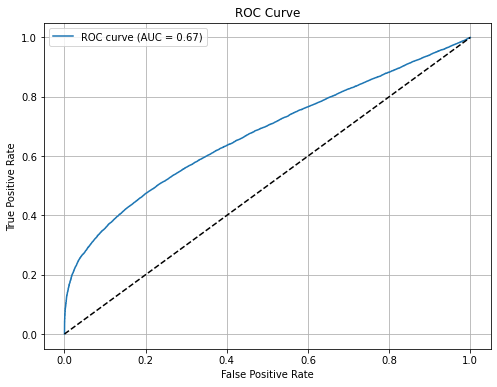

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert label to binary: 1 for landmark, 0 for non-landmark
df['label_bin'] = (df['label'] == 'landmark').astype(int)

fpr, tpr, thresholds = roc_curve(df['label_bin'], df['score'])
auc = roc_auc_score(df['label_bin'], df['score'])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


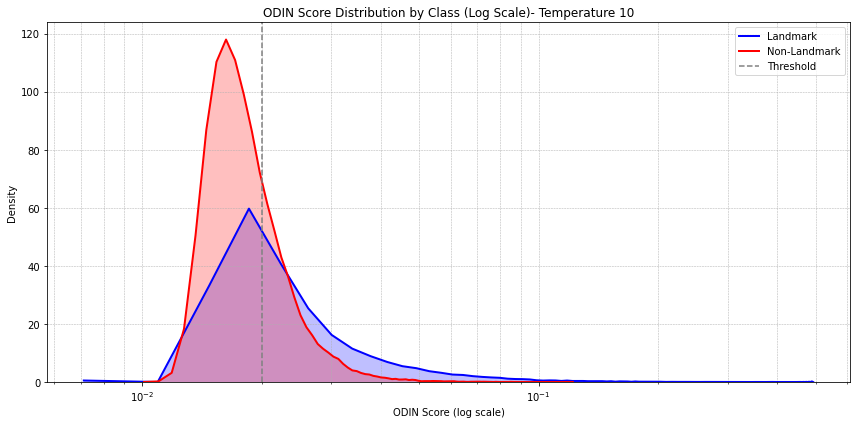

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv('/kaggle/working/odin_scores_10.csv')

# Drop NaNs and invalid scores
df = df.dropna(subset=['score'])

# Split and filter scores > 0 for log scale
landmark_scores = df[(df['label'] == 'landmark') & (df['score'] > 0)]['score']
nonlandmark_scores = df[(df['label'] == 'nonlandmark') & (df['score'] > 0)]['score']

# Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(landmark_scores, shade=True, label='Landmark', color='blue', linewidth=2)
sns.kdeplot(nonlandmark_scores, shade=True, label='Non-Landmark', color='red', linewidth=2)

# Add threshold line
plt.axvline(x=0.02, color='gray', linestyle='--', label='Threshold')

# Log scale for better visibility
plt.xscale('log')
plt.xlabel("ODIN Score (log scale)")
plt.ylabel("Density")
plt.title("ODIN Score Distribution by Class (Log Scale)- Temperature 10")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


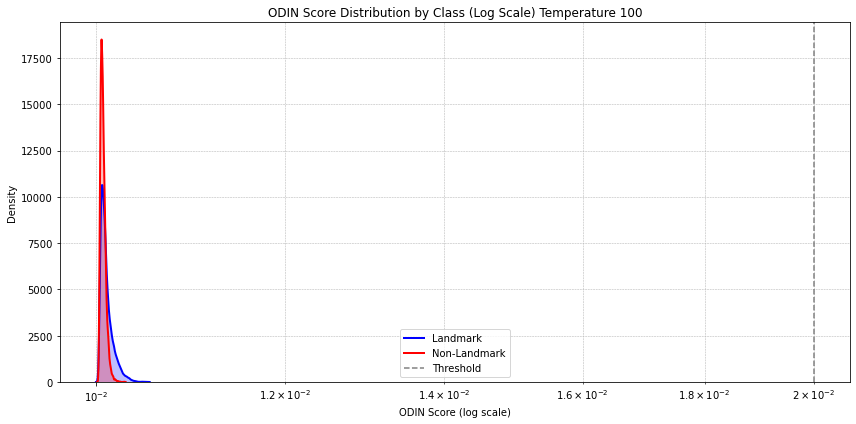

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv('/kaggle/working/odin_scores.csv')

# Drop NaNs and invalid scores
df = df.dropna(subset=['score'])

# Split and filter scores > 0 for log scale
landmark_scores = df[(df['label'] == 'landmark') & (df['score'] > 0)]['score']
nonlandmark_scores = df[(df['label'] == 'nonlandmark') & (df['score'] > 0)]['score']

# Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(landmark_scores, shade=True, label='Landmark', color='blue', linewidth=2)
sns.kdeplot(nonlandmark_scores, shade=True, label='Non-Landmark', color='red', linewidth=2)

# Add threshold line
plt.axvline(x=0.02, color='gray', linestyle='--', label='Threshold')

# Log scale for better visibility
plt.xscale('log')
plt.xlabel("ODIN Score (log scale)")
plt.ylabel("Density")
plt.title("ODIN Score Distribution by Class (Log Scale) Temperature 100")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
import numpy as np

# Load CSV
df = pd.read_csv('/kaggle/working/odin_scores_10.csv')

# Convert labels to binary
df['label_binary'] = df['label'].map({'landmark': 1, 'nonlandmark': 0})

# Convert score to float, and remove invalid values
df['score'] = pd.to_numeric(df['score'], errors='coerce')  # convert invalid to NaN
df = df.dropna(subset=['score', 'label_binary'])  # drop rows with NaN in score or label

# Check for any infinite or very large values
df = df[np.isfinite(df['score'])]  # remove inf/-inf
df = df[df['score'] < 1e6]         # remove absurdly large values, just in case

# Proceed to threshold finding
from sklearn.metrics import roc_curve

scores = df['score'].values
labels = df['label_binary'].values

fpr, tpr, thresholds = roc_curve(labels, scores)
youden_j = tpr - fpr
best_index = youden_j.argmax()
optimal_threshold = thresholds[best_index]

print(f"Optimal Threshold (Youden's J): {optimal_threshold:.6f}")


Optimal Threshold (Youden's J): 0.022769


In [58]:
print(df[df['score'].isna()])
print(df[df['score'] == np.inf])

Empty DataFrame
Columns: [filename, score, label, label_binary]
Index: []
Empty DataFrame
Columns: [filename, score, label, label_binary]
Index: []


## Demo


In [ ]:
from torchvision import transforms
from PIL import Image
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img = Image.open("your_test_image.jpg").convert("RGB")
input_tensor = transform(img).unsqueeze(0).cuda()  # Add batch dim


In [ ]:
def odin_score(model, input_tensor, temperature=1000, epsilon=0.0014):
    input_tensor.requires_grad_()

    # Forward pass
    output = model(input_tensor)
    output = output / temperature
    max_score, pred = output.max(1)

    # Backward on max logit
    loss = -max_score
    loss.backward()

    # Add small noise in gradient direction
    gradient = torch.sign(input_tensor.grad.data)
    perturbed_input = input_tensor - epsilon * gradient
    perturbed_input = torch.clamp(perturbed_input, 0, 1)

    # Second forward pass
    output_perturbed = model(perturbed_input)
    output_perturbed = output_perturbed / temperature
    softmax = torch.nn.functional.softmax(output_perturbed, dim=1)

    # Use max softmax probability as ODIN score
    odin_score = softmax.max(1)[0].item()
    return odin_score


In [ ]:
score = odin_score(model, input_tensor)

if score >= 0.022769:
    print(f"Image is likely an **In-Distribution (Landmark)** with ODIN score {score:.6f}")
else:
    print(f"Image is likely **Out-of-Distribution (Non-Landmark)** with ODIN score {score:.6f}")
